In [1]:
from cryptocmd import CmcScraper
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re
import math

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.ensemble import VotingRegressor
from vecstack import stacking
# from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib import pyplot
import pylab as py
print('All good!')

C:\Users\OLUWADAMILARE\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\OLUWADAMILARE\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


All good!


In [2]:
scraper_train = CmcScraper("ETH","04-08-2017", "03-08-2022")
train_xrp_json_data = scraper_train.get_data("json")
df_train = scraper_train.get_dataframe()[['Date', 'Close']]
df_train.head()

,Date,Close
0,2022-08-03,1618.874543
1,2022-08-02,1632.945439
2,2022-08-01,1635.195792
3,2022-07-31,1681.517319
4,2022-07-30,1695.969500


C:\Users\OLUWADAMILARE\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


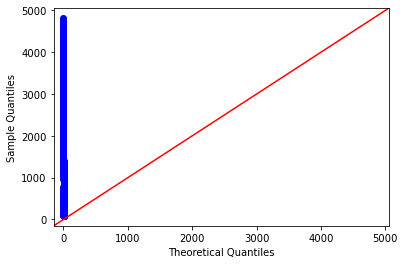

In [3]:
### QQ plot

sm.qqplot(df_train[['Close']], line = '45')
py.show()

In [4]:
df_train.shape

(1826, 2)

In [22]:
df_train.reset_index(drop = True)

,Date,Close
0,2022-08-03,1618.874543
1,2022-08-02,1632.945439
2,2022-08-01,1635.195792
3,2022-07-31,1681.517319
4,2022-07-30,1695.969500
...,...,...
1821,2017-08-08,296.769012
1822,2017-08-07,269.179993
1823,2017-08-06,261.566986
1824,2017-08-05,256.506989


In [23]:
closedf = df_train
close_stock = closedf.copy()

In [25]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1826, 1)


In [26]:
training_size = int(len(closedf)*0.80)
test_size = len(closedf) - training_size
train_data, test_data = closedf[0:training_size, :], closedf[training_size:len(closedf), :]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1460, 1)
test_data:  (366, 1)


In [28]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [29]:
time_step = 7
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1452, 7)
y_train:  (1452,)
X_test:  (358, 7)
y_test (358,)
